In [131]:
from scripts.ambiente import Ambiente
from scripts.leitor import Leitor
from scripts.problems import Nrainhas, AlgebricFunction, FabricaDeRadios, NrainhasSum
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from joblib import  Parallel, delayed

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


    NRAINHAS

In [132]:
config = Leitor().loadConfig('data/data_maxnrainhas16.txt')
problem = NrainhasSum()
ambientes = [
    Ambiente(
        config=config,
        problem=problem,
        parallel=False,
    ) for _ in range(10)
]
def run(ambiente:Ambiente):
    ambiente.run()
    return ambiente

ambientes = Parallel(n_jobs=-1)(
    delayed(run)(ambiente) for ambiente in ambientes
)

100%|██████████| 10000/10000 [00:22<00:00, 444.21it/s]


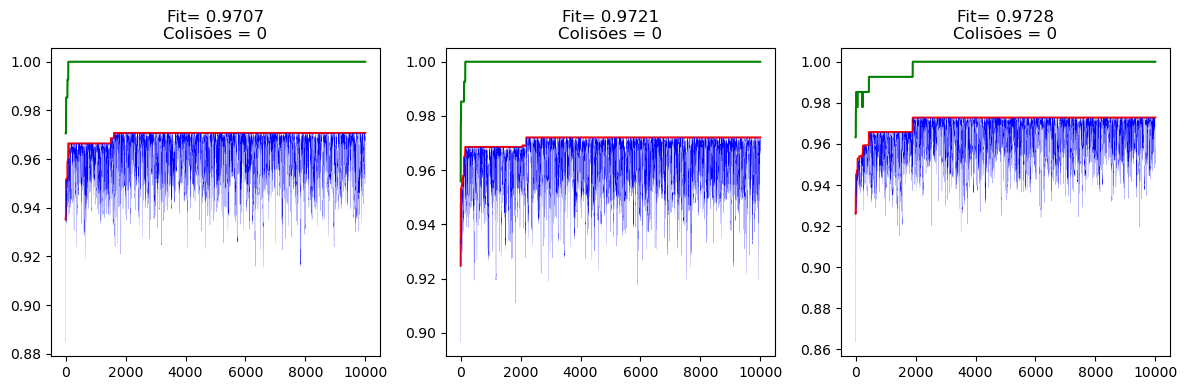

In [143]:
fig, axes = plt.subplots(1,3,figsize=(12,4))
for i in range(3):
    k = i +6
    best_solution = problem.decode(ambientes[k].elite_population[0])
    fit_value = problem.fitness(best_solution)
    penality_value = problem._number_of_colisions(best_solution)
    title = 'Fit= ' + f"{fit_value:.4f}" + '\n' + 'Colisões = ' + str(penality_value)
    sns.lineplot(ambientes[k].results_best,color='Red',ax=axes[i]).set(title=title)
    sns.lineplot(ambientes[k].results_mean,color='Blue',ax=axes[i],linewidth=0.1)
    sns.lineplot([1-x for x in ambientes[k].results_penality],color='Green',ax=axes[i])
plt.tight_layout()

    FUNÇÃO

In [3]:
config = Leitor().loadConfig('data/data_algebric.txt')
problem = AlgebricFunction(config)


ValueError: invalid literal for int() with base 10: '(-2'

    RADIO

In [52]:
config = Leitor().loadConfig('data/data_fabrica_de_radios.txt')
problem = FabricaDeRadios()

In [37]:
a = np.array([2,3,4,5,6,8])
print(a[:3],a[3:])

[2 3 4] [5 6 8]


0
100
200
300
400
500
600
700
800
900


<Axes: >

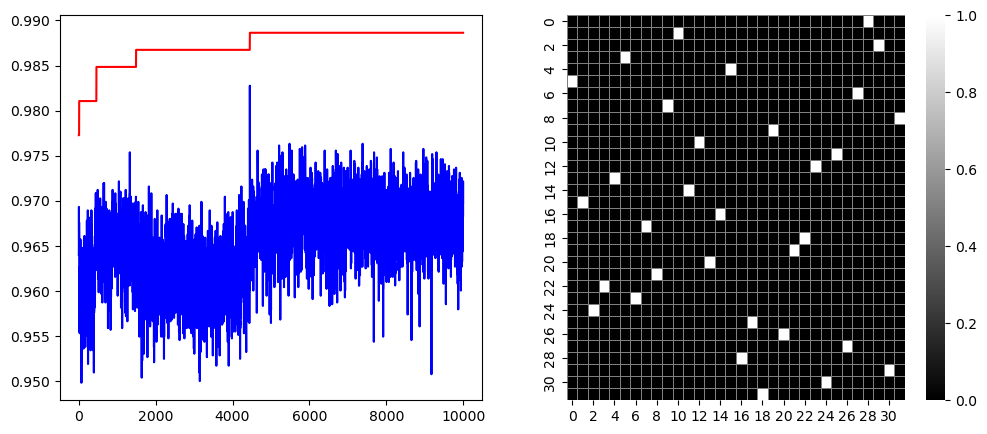

In [22]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.lineplot(ambiente.results_best,color='Red',ax=ax[0])
sns.lineplot(ambiente.results_mean,color='Blue',ax=ax[0])
sns.heatmap(problem.get_matrix(problem.decode(ambiente.elite_population[0])),linewidths=0.5,linecolor='Gray',cmap='gray',ax=ax[1])

In [19]:
nrainhas.decode(ambiente.population[0])

[(0, 2), (1, 4), (2, 3), (3, 5), (4, 7), (5, 1), (6, 6), (7, 0)]

In [20]:
nrainhas.encode(nrainhas.decode(ambiente.population[0]))

array([2, 4, 3, 5, 7, 1, 6, 0])

In [48]:
eval('[2,4]')[1]

4

In [4]:
DIM = 11
eval('[i for i in range(DIM)]')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]